In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data into a pandas DataFrame
data = pd.read_json('data/alert_data.json') # Replace 'your_data.csv' with the actual filename or path of your data

# Perform any necessary data preprocessing, such as handling missing values or encoding categorical variables
# For example, if 'subject', 'currentState', 'alertClass', 'alertSubClass', 'alertCategory', and 'alertSubCategory' are categorical variables, you can use pandas' get_dummies() function to one-hot encode them:
data = pd.get_dummies(data, columns=['subject', 'priority', 'currentState', 'alertClass', 'alertSubClass', 'alertCategory', 'alertSubCategory'])

# Split the data into features (X) and target variable (y)
X = data.drop('healTime', axis=1) # Features
y = data['healTime'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # You can adjust the test_size and random_state as needed


In [5]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.296787628872783e+30


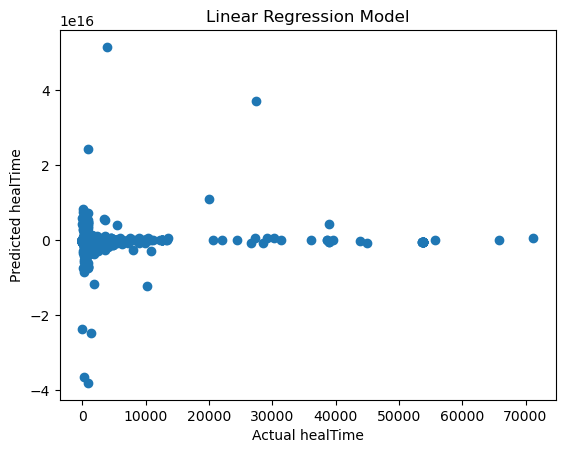

In [7]:
# Create a scatter plot of the predicted healTime values versus the actual healTime values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual healTime')
plt.ylabel('Predicted healTime')
plt.title('Linear Regression Model')
plt.show()

In [8]:
# You can interpret the coefficients of the linear regression model to understand the relationship between the features and the target variable
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [ 2.44562488e+02 -5.54440707e+03  3.68210003e+14 ... -4.62997487e+16
 -8.53234491e+16  1.16639092e+16]
Intercept: 6.494046409293873e+16


second script

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


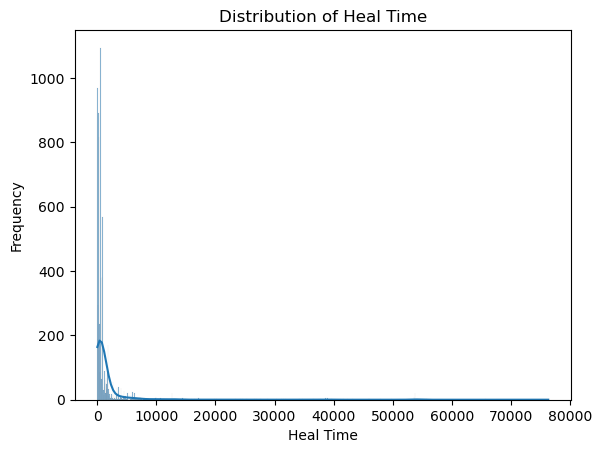

ValueError: Image size of 880750x250 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 880750x250 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 880750x250 with 3523 Axes>

In [12]:
# Visualize the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.xlabel('Heal Time')
plt.ylabel('Frequency')
plt.title('Distribution of Heal Time')
plt.show()

# Visualize the relationship between the target variable and other features
sns.pairplot(data, x_vars=X.columns, y_vars='healTime', diag_kind='kde')
plt.show()

# Check for multicollinearity using variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


In [13]:
# Check for outliers in the target variable
sns.boxplot(y_train)
plt.ylabel('Heal Time')
plt.title('Boxplot of Heal Time')
plt.show()

# Handle outliers by winsorizing the target variable
from scipy.stats.mstats import winsorize

y_train = winsorize(y_train, limits=[0.05, 0.05])

# Scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['repeatCount']] = scaler.fit_transform(X_train[['repeatCount']])
X_test[['repeatCount']] = scaler.transform(X_test[['repeatCount']])


KeyError: 0

In [ ]:
# Perform feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
